# Students Performance in Exams 📚🤓

## Introduction
Predicting the performance of students in exams using the data provided, practiciong the data analysis and machine learning skills, using Random Forest Regressor.

Thanks for visiting my notebook, if you like it, please upvote it. :)

Be happy and keep learning. 


In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('exams.csv')
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
51,female,group C,some high school,free/reduced,none,52,58,60
296,male,group D,some high school,free/reduced,none,50,47,46
835,female,group B,some high school,standard,none,76,81,79
960,male,group C,associate's degree,standard,completed,49,58,55
887,female,group B,associate's degree,free/reduced,completed,53,74,75


In [3]:
# check for missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
# check for duplicates
df.duplicated().sum()


1

In [5]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [7]:
df.describe()


,math score,reading score,writing score
count,999.000000,999.000000,999.000000
mean,66.362362,68.970971,67.705706
std,15.373794,14.711935,15.575322
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.000000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


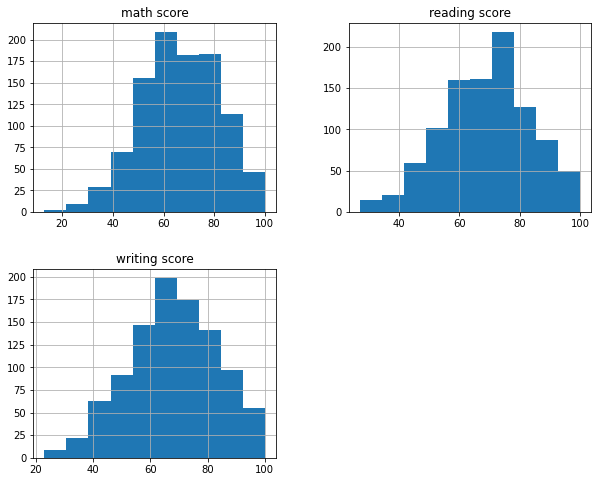

In [8]:
# plot histograms
df.hist(figsize=(10,8));


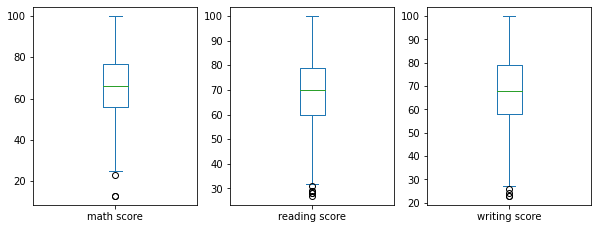

In [9]:
# plot boxplots
df.plot(kind='box', subplots=True, layout=(2,3), figsize=(10,8));


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       999 non-null    object
 1   race/ethnicity               999 non-null    object
 2   parental level of education  999 non-null    object
 3   lunch                        999 non-null    object
 4   test preparation course      999 non-null    object
 5   math score                   999 non-null    int64 
 6   reading score                999 non-null    int64 
 7   writing score                999 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 70.2+ KB


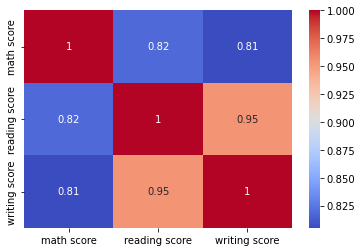

In [12]:
# plot correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm');


In [16]:
# convert categorical variables to numerical
cat_cols = df.select_dtypes(include=['object']).columns
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col in cat_cols:
    df[col] = labelencoder.fit_transform(df[col])


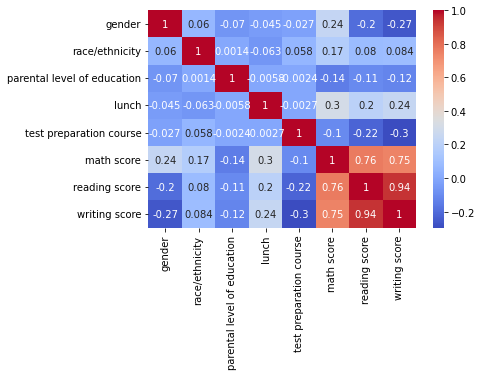

In [32]:
# plot correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm');

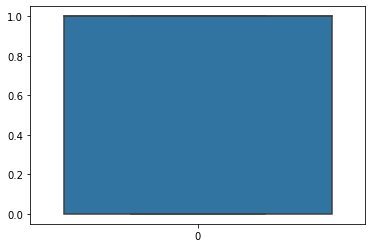

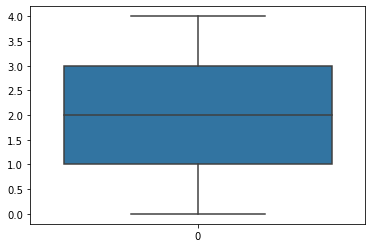

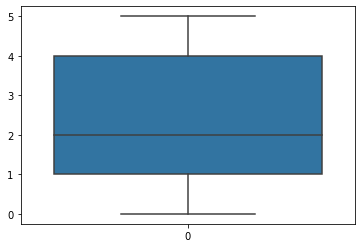

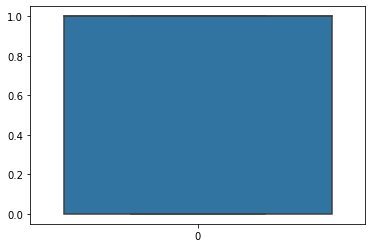

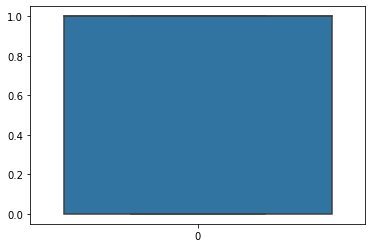

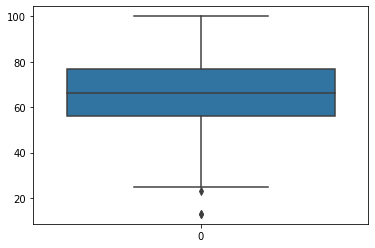

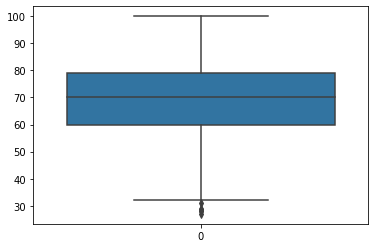

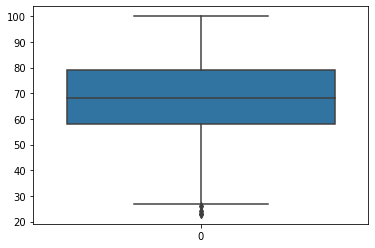

In [17]:
# check for outliers
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols
for col in num_cols:
    sns.boxplot(df[col])
    plt.show()

In [20]:
from scipy import stats
z = np.abs(stats.zscore(df[num_cols]))
df = df[(z < 2).all(axis=1)]

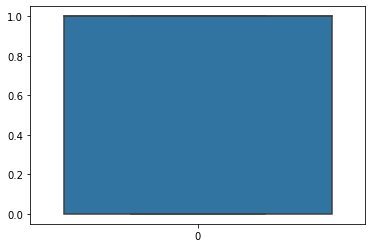

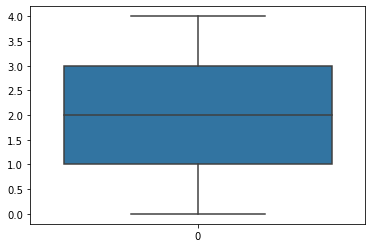

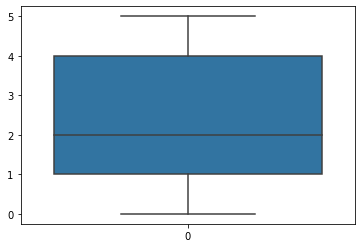

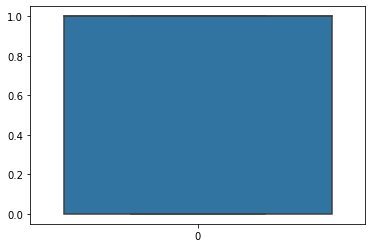

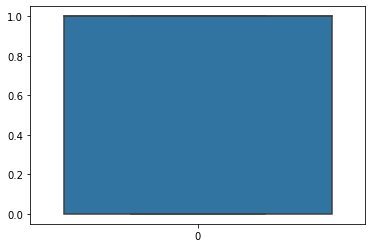

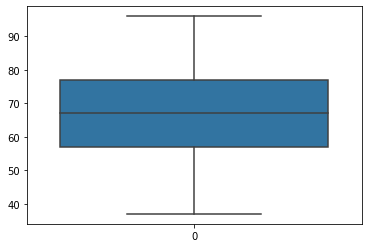

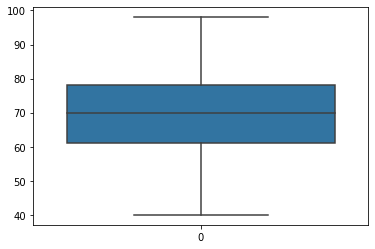

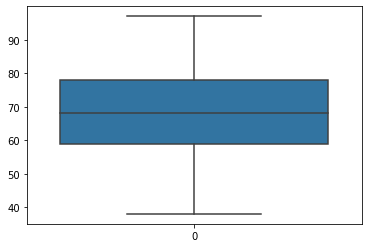

In [21]:
for col in num_cols:
    sns.boxplot(df[col])
    plt.show()

In [23]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
60,1,3,4,0,1,76,66,68
966,0,0,5,0,0,55,73,70
687,1,3,0,1,0,78,69,71
213,1,2,5,1,1,62,66,64
532,0,1,4,0,1,45,59,56


In [24]:
# import logistic RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# split data into train and test sets
X = df.drop(['math score', 'reading score', 'writing score'], axis=1)
y = df['math score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# instantiate model
rf = RandomForestRegressor(n_estimators=100, random_state=42)


In [25]:
# fit model
rf.fit(X_train, y_train)

# predict
y_pred = rf.predict(X_test)

# evaluate model

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: ', mse)


Mean squared error:  147.8106302647617


In [26]:
# calculate r2 score
r2 = r2_score(y_test, y_pred)
print('R2 score: ', r2)


R2 score:  0.0076485793369743815


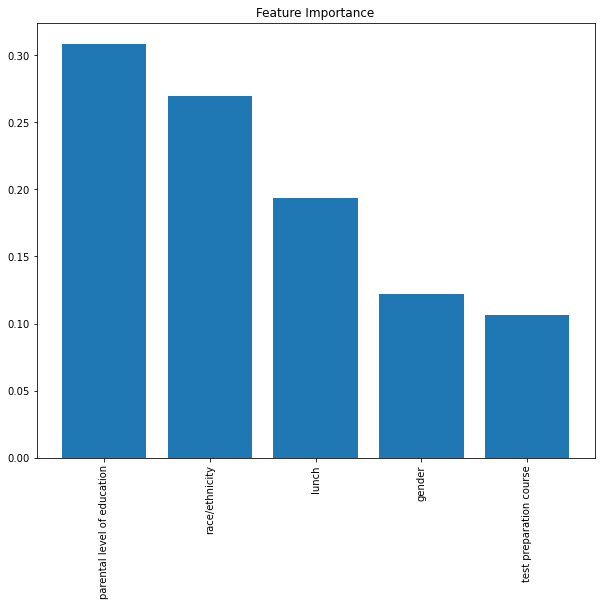

In [27]:
# plot feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns
plt.figure(figsize=(10,8))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.show()

In [28]:
# train model on with other class
y = df['reading score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# instantiate model

rfReadingScore = RandomForestRegressor(n_estimators=100, random_state=42)

# fit model

rfReadingScore.fit(X_train, y_train)

# predict

y_pred = rfReadingScore.predict(X_test)

# evaluate model

# calculate mean squared error

mse = mean_squared_error(y_test, y_pred)

print('Mean squared error: ', mse)

# calculate r2 score

r2 = r2_score(y_test, y_pred)

print('R2 score: ', r2)


Mean squared error:  132.41672117344046
R2 score:  0.05172245910598583


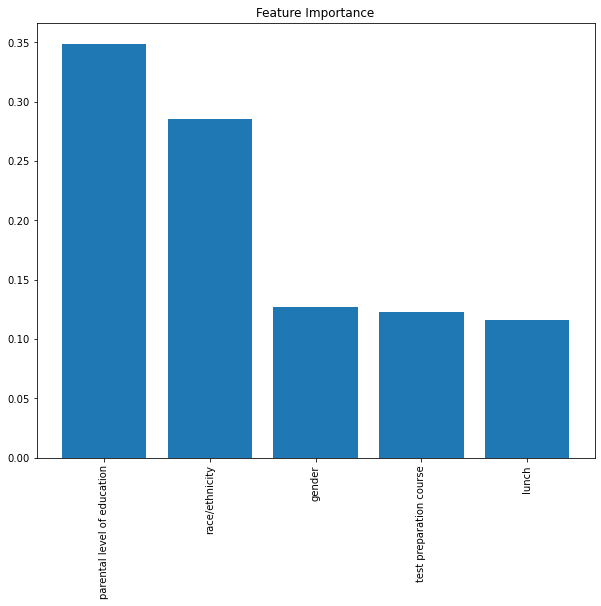

In [29]:
# plot feature importance
importances = rfReadingScore.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns
plt.figure(figsize=(10,8))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.show()

In [30]:
# train model on with other class
y = df['writing score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# instantiate model

rfWritingScore = RandomForestRegressor(n_estimators=100, random_state=42)

# fit model

rfWritingScore.fit(X_train, y_train)

# predict

y_pred = rfWritingScore.predict(X_test)

# evaluate model

# calculate mean squared error

mse = mean_squared_error(y_test, y_pred)

print('Mean squared error: ', mse)

# calculate r2 score

r2 = r2_score(y_test, y_pred)

print('R2 score: ', r2)



Mean squared error:  134.21090160574963
R2 score:  0.1843616223760962


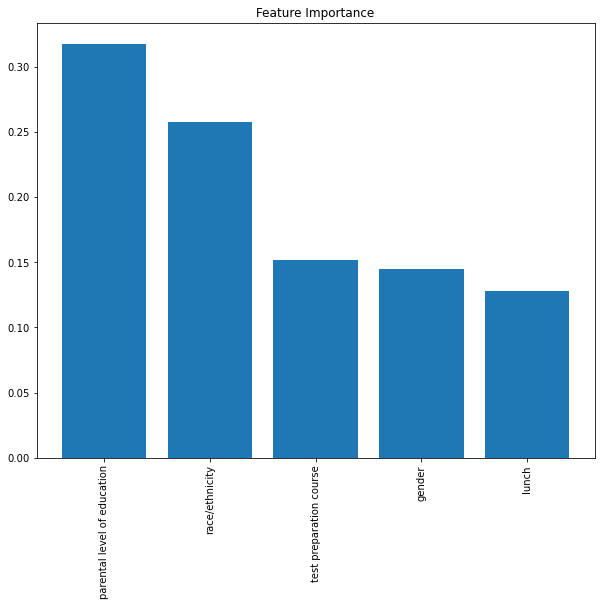

In [31]:
# plot feature importance
importances = rfWritingScore.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns
plt.figure(figsize=(10,8))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.show()
